In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('ODI-2021.csv')
print(df.shape)
df.head()

(313, 17)


,Timestamp,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,3/16/2021 14:37:20,Master Tax Law - Tax and Technology,yes,0,mu,ja,male,neither,july 6,2,no,85,50,8,22.15,Having completed a set task.,Happy people
1,3/24/2021 17:28:48,AI,no,0,sigma,nee,male,I have no idea what you are talking about,December 7,0,no,0,100,3,10,Coffee,Sun
2,3/25/2021 12:31:29,DMT,no,0,mu,nee,male,fat,23 September 1997,4,no,40,5,33,00:00,Be Happy,Having a very productive day
3,3/25/2021 15:56:30,CS,no,1,mu,ja,male,I have no idea what you are talking about,30-07-1999,NaN,no,42,5,2147483648,?,If you give me a 10,If you give my team a 10
4,3/25/2021 17:41:04,AI,yes,0,mu,ja,female,neither,08.03.1998,1,no,20,50,4,2,nice weather,having good food


<Figure size 360x216 with 0 Axes>

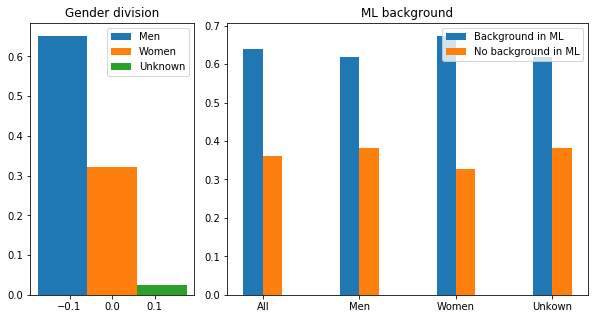

In [4]:
fig = plt.figure(figsize=(5,3))

all_ML_answ = df['Have you taken a course on machine learning?']
all_ML_rate = np.zeros(len(all_ML_answ))

men_ML_answ = df.loc[df['What is your gender?']=='male', 
                          'Have you taken a course on machine learning?']
men_ML_rate = np.zeros(len(men_ML_answ))

fem_ML_answ = df.loc[df['What is your gender?']=='female', 
                          'Have you taken a course on machine learning?']
fem_ML_rate = np.zeros(len(fem_ML_answ))

unk_ML_answ = df.loc[df['What is your gender?']=='unknown', 
                          'Have you taken a course on machine learning?']
unk_ML_rate = np.zeros(len(unk_ML_answ))

for i,v in enumerate(all_ML_answ):
    if v=='yes':
        all_ML_rate[i] = 1

for i,v in enumerate(men_ML_answ):
    if v=='yes':
        men_ML_rate[i] = 1
        
for i,v in enumerate(fem_ML_answ):
    if v=='yes':
        fem_ML_rate[i] = 1
        
for i,v in enumerate(unk_ML_answ):
    if v=='yes':
        unk_ML_rate[i] = 1

labels = ['Gender']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(10,5))
grid = gridspec.GridSpec(1,3)

sub1 = plt.subplot(grid[0,0])
sub1.set_title('Gender division')

rects1 = sub1.bar(x - width/3, len(men_ML_rate)/len(all_ML_rate),
                  width/3, label='Men')
rects2 = sub1.bar(x, len(fem_ML_rate)/len(all_ML_rate), 
                  width/3, label='Women')
rects3 = sub1.bar(x + width/3, len(unk_ML_rate)/len(all_ML_rate), 
                  width/3, label='Unknown')
sub1.legend()

width=0.2

labels = ['ML', 'No ML']
labels = ['All', 'Men', 'Women', 'Unkown']
x = np.arange(len(labels))  # the label locations

sub2 = plt.subplot(grid[0,1:])
sub2.set_title('ML background')
    
all_genders = [all_ML_rate, men_ML_rate, fem_ML_rate, men_ML_rate]
    
per_gender1 = np.array([sum(gender)/len(gender) for gender in all_genders])
per_gender2 = 1 - per_gender1
sub2.bar(x - width/2, per_gender1, width, label='Background in ML')
sub2.bar(x + width/2, per_gender2, width, label='No background in ML')
sub2.set_xticks(x)
sub2.set_xticklabels(labels)
sub2.legend()

### Regression

In [51]:
# Predict gender based on the following attributes:
# attributes = ['Have you taken a course on machine learning?',
#               'Have you taken a course on information retrieval?',
#               'Have you taken a course on statistics?',
#               'Have you taken a course on databases?',
#               'What is your stress level (0-100)?']

attributes = ['Have you taken a course on machine learning?',
              'Have you taken a course on statistics?',
              'Have you taken a course on databases?',
              'Have you taken a course on information retrieval?']

label = 'What is your gender?'

def run_ML_classification(attributes, label):
    
    # Only select students for which the gender is either male or female
    df_bin = df.loc[df['What is your gender?'] != 'unknown']

    # Create binary variables:
    df_bin = df_bin.replace(['yes','no','mu','sigma','ja','nee','male','female'], 
                            [1, 0, 1, 0, 1, 0, 1,0])

    # Delete rows that contain 'unknown'
    for attr in attributes:
        df_bin = df_bin[df[attr] != 'unknown']

    print(df_bin.shape)

    # Create training and test sets
    df_attr = df_bin[attributes]
    df_labl = df_bin[label]


    df_attr_train = df_attr[:180]
    df_attr_test  = df_attr[180:]

    df_labl_train = df_labl[:180]
    df_labl_test  = df_labl[180:]

    # Train ML algorithms
    knn = KNeighborsClassifier()
    knn.fit(df_attr_train, df_labl_train)
    knn_pred = knn.score(df_attr_test, df_labl_test)
    print(f'KNN predicts {knn_pred}% correctly')

    nn = MLPClassifier()
    nn.fit(df_attr_train, df_labl_train)
    nn_pred = nn.score(df_attr_test, df_labl_test)
    print(f'NN predicts {nn_pred}% correctly')

    dt = DecisionTreeClassifier()
    dt.fit(df_attr_train, df_labl_train)
    dt_pred = dt.score(df_attr_test, df_labl_test)
    print(f'Decision Tree predicts {dt_pred}% correctly')
    
    return knn_pred, nn_pred, dt_pred

run_ML_classification(attributes, label)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(267, 17)
KNN predicts 0.6896551724137931% correctly
NN predicts 0.6896551724137931% correctly
Decision Tree predicts 0.6206896551724138% correctly


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.6896551724137931, 0.6896551724137931, 0.6206896551724138)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(305, 17)
KNN predicts 0.672% correctly
NN predicts 0.672% correctly
Decision Tree predicts 0.672% correctly
(289, 17)
KNN predicts 0.6880733944954128% correctly
NN predicts 0.6880733944954128% correctly
Decision Tree predicts 0.6880733944954128% correctly
(282, 17)
KNN predicts 0.5784313725490197% correctly
NN predicts 0.6764705882352942% correctly
Decision Tree predicts 0.6568627450980392% correctly
(267, 17)
KNN predicts 0.6896551724137931% correctly


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


NN predicts 0.6896551724137931% correctly
Decision Tree predicts 0.6206896551724138% correctly
(267, 17)
KNN predicts 0.6896551724137931% correctly
NN predicts 0.6896551724137931% correctly
Decision Tree predicts 0.6206896551724138% correctly


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


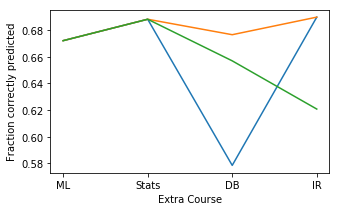

In [68]:
# Give algorithms increasing amounts of attributes
all_res = []
for i in range(1,6):
    res = run_ML_classification(attributes[:i], label)
    all_res += [res]

courses = ['ML', 'Stats', 'DB', 'IR']    

fig = plt.figure(figsize=(5,3))

for j in range(3):
    plt.plot(range(1,5), [all_res[k][j] for k in range(4)])

plt.xticks(range(1,5),courses)
plt.ylabel('Fraction correctly predicted')
plt.xlabel('Extra Course')
plt.show()
    